In [ ]:
with open('distances.txt', 'r') as file:
    lines = file.readlines()

# Initialize a dictionary to store distances for each frame
distances = {}

# Parse the data
for line in lines:
    if line.startswith('Frame'):
        frame_number = line.split()[1].strip(':')
        distances[frame_number] = {}
    elif line.startswith('Distance between'):
        try:
            # Split the line by ':', then extract atom names and distance
            parts = line.split(':')
            atoms = parts[0].split()[3:5]
            atom1_name = atoms[0].split('`')[-1]  # Take the last part after splitting by '`'
            atom2_name = atoms[1].split('`')[-1]  # Take the last part after splitting by '`'
            distance = float(parts[1])
            distances[frame_number][(atom1_name, atom2_name)] = distance
        except (IndexError, ValueError) as e:
            print("Error parsing line:", line)

# Print the distances for each frame
for frame, frame_distances in distances.items():
    print(f"Frame {frame}:")
    for atom_pair, distance in frame_distances.items():
        print(f"    {atom_pair[0]} - {atom_pair[1]}: {distance}")
    print()


In [21]:
for frame, frame_distances in distances.items():
    print(f"Frame {frame}:")
    max_distance = max(frame_distances.values())
    for atom_pair, distance in frame_distances.items():
        normalized_distance = int(distance / max_distance * 10)  # Normalize distance for plotting
        print(f"    {atom_pair[0]} - {atom_pair[1]}:", "=" * normalized_distance)
    print()
def plot_ascii(distances):
    for frame, frame_distances in distances.items():
        print(f"Frame {frame}:")
        max_distance = max(frame_distances.values())
        print("Distance Plot:")
        for atom_pair, distance in frame_distances.items():
            normalized_distance = int(distance / max_distance * 10)  # Normalize distance for plotting
            print(f"    {atom_pair[0]} - {atom_pair[1]}:", "=" * normalized_distance)
        print()

Frame 1:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 2:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 3:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 4:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 5:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 6:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 7:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 8:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 9:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 10:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 11:
    and - 196/O1: ==========
    and - 49/HG1: ====
    and - 196/H1: ====

Frame 12:
    and - 196/O1: ==========
    and - 49/HG1: ====
 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Open the file and read all lines
with open('distances.txt', 'r') as file:
    lines = file.readlines()

# Initialize lists to store data
frames = []
atoms = []
distances = []

# Parse the data
for line in lines:
    if line.startswith('Frame'):
        frame_number = line.split()[1].strip(':')
    elif line.strip():  # Check if line is not empty
        parts = line.split(':')
        atoms_str = parts[0].split()[3:5]
        try:
            atom1_name = atoms_str[0].split('`')[-1]
            atom2_name = atoms_str[1].split('`')[-1]
            distance = float(parts[1])
        
            # Append data to lists
            frames.append(frame_number)
            atoms.append(f"{atom1_name} - {atom2_name}")
            distances.append(distance)
        except Exception as e:
            print("Error parsing line:", line)
            print("Error message:", str(e))

# Create a DataFrame
df = pd.DataFrame({'Frame': frames, 'Atom Pair': atoms, 'Distance': distances})

# Display the DataFrame
print(df)

# Now you can use pandas plotting capabilities
# Set 'Frame' as index for plotting
df.set_index(['Frame', 'Atom Pair'], inplace=True)

# Remove duplicate entries if any
df = df[~df.index.duplicated(keep='first')]

# Check if DataFrame is empty
if df.empty:
    print("DataFrame is empty. Please check the input data.")
else:
    # Increase plot size
    plt.figure(figsize=(20, 8))

    # Get unique atom pairs
    unique_pairs = df.index.get_level_values('Atom Pair').unique()

    # Define colors for each unique atom pair
    colors = plt.cm.tab10(range(len(unique_pairs)))

    # Plotting each atom pair with a different color
    for idx, (pair, color) in enumerate(zip(unique_pairs, colors)):
        df.loc[(slice(None), pair), 'Distance'].plot(marker='o', linestyle='-', label=pair, color=color)

    # Add legend
    plt.legend()

    # Set labels
    plt.xlabel('Frame')
    plt.ylabel('')  # Empty string to remove y-axis label

    # Show the plot
    plt.show()

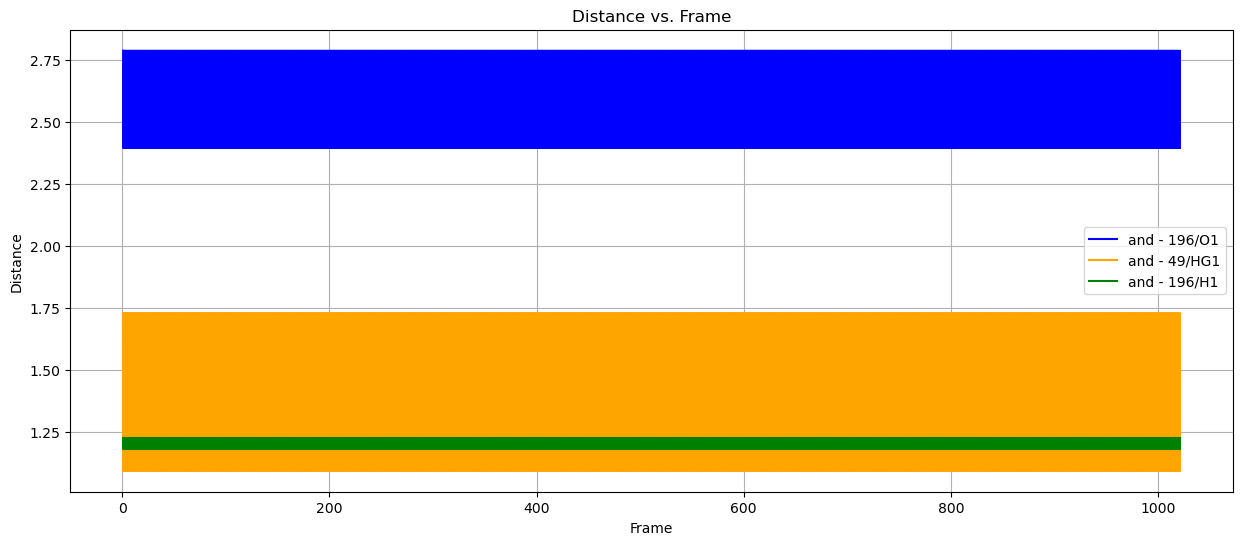

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file into a DataFrame
with open('distances.txt', 'r') as file:
    lines = file.readlines()

data = {'Frame': [], 'Atom Pair': [], 'Distance': []}

for line in lines:
    if line.startswith('Frame'):
        frame_number = line.split()[1].strip(':')
    elif line.startswith('Distance between'):
        parts = line.split(':')
        atoms = parts[0].split()[3:5]
        atom1_name = atoms[0].split('`')[-1]
        atom2_name = atoms[1].split('`')[-1]
        distance = float(parts[1])
        
        data['Frame'].append(frame_number)
        data['Atom Pair'].append(f"{atom1_name} - {atom2_name}")
        data['Distance'].append(distance)

df = pd.DataFrame(data)

# Convert 'Frame' column to numeric type
df['Frame'] = pd.to_numeric(df['Frame'])

# Plot the data
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Specify colors for each line
for i, atom_pair in enumerate(df['Atom Pair'].unique()):
    df_atom_pair = df[df['Atom Pair'] == atom_pair]
    plt.plot(df_atom_pair['Frame'], df_atom_pair['Distance'], label=atom_pair, color=colors[i])

plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Distance vs. Frame')
plt.legend()
plt.grid(True)
plt.show()